In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import time
from IPython.display import display, clear_output
import glob
import os
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline, splrep, splev
import scipy.signal

In [2]:
Files = glob.glob("*EC.txt")
Open_Files = []
for file in range(len(Files)):
    Temp_file = open(Files[file],'r')
    for i in Temp_file:
        Open_Files.append(i.strip("())\n"))
    Temp_file.close()
for line in range(len(Open_Files)):
    Open_Files[line] = Open_Files[line].split(',')
Open_Files = np.array([np.array(i).astype(float) for i in Open_Files])

Emissions = []
for i in Files:
    Emissions.append(int(i[-10:-6].strip("_")))
print(Emissions)

[1000, 900, 800, 700, 600, 500, 450, 400, 350, 300, 275, 250, 225, 200, 175, 150, 125, 100, 75, 50, 25]


In [3]:
Iterator = int(len(Open_Files)/len(Files))
print(Iterator)
All_Emissions = np.zeros([len(Files),Iterator,2])
for i in range(len(Files)):
    All_Emissions[i] = Open_Files[Iterator*i:Iterator*(i+1)]

165


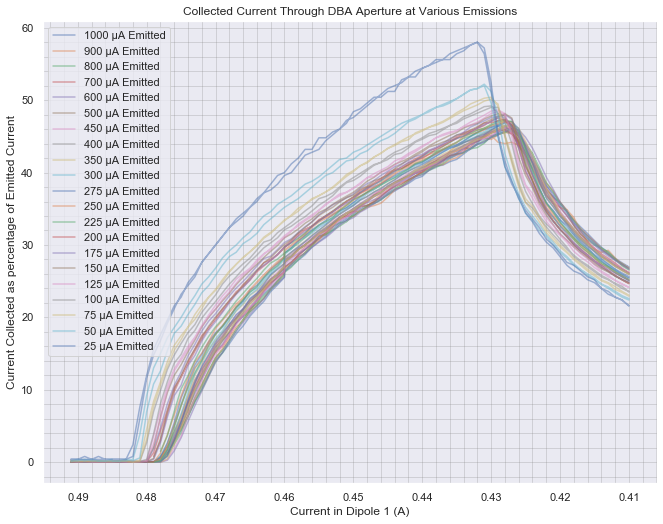

In [4]:
plt.figure(figsize = (11,8.5))
view_list = range(len(All_Emissions))
#view_list = [0]
for run in view_list:
    #plt.scatter(All_Emissions[run,:,0],100*abs(All_Emissions[run,:,1]/max(abs(All_Emissions[run,:,1]))),label = "{} \u03BCA Emitted".format(Emissions[run]))
    plt.plot(All_Emissions[run,:,0],100*1000*abs(All_Emissions[run,:,1]/Emissions[run]),label = "{} \u03BCA Emitted".format(Emissions[run]),alpha = 0.5)
plt.minorticks_on()
plt.grid(True,alpha = 0.25,which = 'both',color = 'gray')
plt.legend()
plt.title("Collected Current Through DBA Aperture at Various Emissions")
#plt.xlim(.475,.480)
#plt.ylim(-5,10)
plt.xlabel("Current in Dipole 1 (A)")
plt.ylabel("Current Collected as percentage of Emitted Current")
plt.gca().invert_xaxis()
#plt.savefig("DP1_Results.svg",transparent = True)

In [5]:
All_Emissions_Avg = np.zeros([len(Files),int([i-1 if i%2 != 0 else i for i in [Iterator]][0]/2),2])

for num,k in enumerate(All_Emissions):
    for i in range(int(len(k)/2)):
        for j in range(int(len(k)/2)):
            #if np.shape(All_Emissions)[1] %2 != 0:
            if k[i,0] == k[j,0]:
                All_Emissions_Avg[num,i] = (([k[i,0],(k[i,1]+k[j,1])/2]))

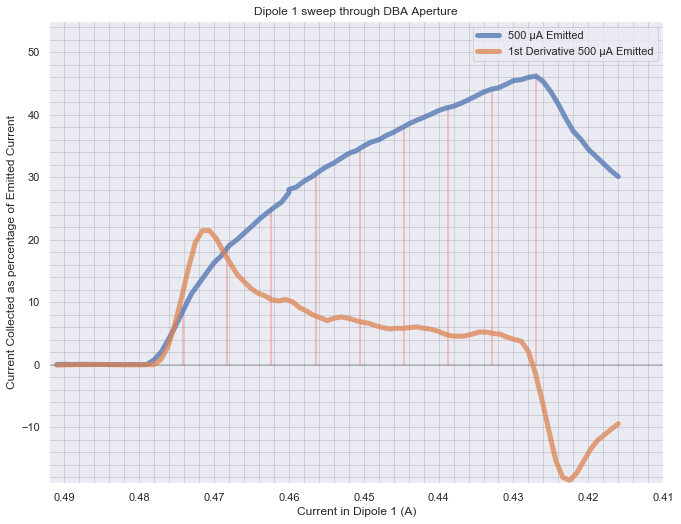

In [6]:
plt.figure(figsize = (11,8.5))
view_list = range(len(All_Emissions_Avg))
view_list = [5]

for run in view_list:
    x_data = All_Emissions_Avg[run,:,0]
    plt.plot(x_data,1e5*abs(All_Emissions_Avg[run,:,1]/Emissions[run]),label = "{} \u03BCA Emitted".format(Emissions[run]),alpha = 0.75,linewidth = 5)
    x = np.linspace(min(x_data),max(x_data),len(All_Emissions_Avg[run,:,0]))
    y = 1e7*abs(All_Emissions_Avg[run,:,1])
    #derivative = splrep(x,y,k=5,s=1e6)
    x_plot = np.linspace(max(x_data),min(x_data),len(All_Emissions_Avg[run,:,0]))
    #plt.plot(x_plot, splev(x,derivative,der=1)/1e5, label="Derivative {} \u03BCA Emitted".format(Emissions[run]))
    
    dydx = scipy.signal.savgol_filter(y, window_length=7, polyorder=2, deriv=1)
    plt.plot(x_plot, dydx*2e-4, label="1st Derivative {} \u03BCA Emitted".format(Emissions[run]),linewidth = 5,alpha = 0.75)
    
plt.minorticks_on()
plt.grid(True,alpha = 0.25,which = 'both',color = 'gray')
plt.legend()
plt.title("Dipole 1 sweep through DBA Aperture")
plt.xlim(.41,.492)
plt.hlines(0,1,0,alpha = 0.25)

x_mindex = np.where(All_Emissions_Avg[run,:,1] == min(All_Emissions_Avg[run,:,1]))[0][0]
x_maxdex = 0.480
for i in np.linspace(All_Emissions_Avg[run,x_mindex,0],x_maxdex,10):
    index = np.where(All_Emissions_Avg[run,:,0] == round(i,3))[0][0]
    plt.vlines(i,0,1e5*abs(All_Emissions_Avg[run,index,1]/Emissions[run]),alpha = 0.25,color = 'red')
    
plt.ylim(-19,55)
plt.xlabel("Current in Dipole 1 (A)")
plt.ylabel("Current Collected as percentage of Emitted Current")
plt.gca().invert_xaxis()
plt.savefig("DP1_Results.svg",transparent = True)

In [9]:
import numpy as np
a = np.linspace(-2,1,100)
b = np.linspace(2,3,100)
c = np.linspace(4,5,100)
d = np.linspace(6,7,100)
e = a**2

In [27]:
thing = np.array([a,b,c,d,e])
for line in range(len(thing[0,:])):
    for row in range(len(thing[:,0])):
        print(thing[row,line])
    print('\n')

-2.0
2.0
4.0
6.0
4.0


-1.9696969696969697
2.01010101010101
4.01010101010101
6.01010101010101
3.879706152433425


-1.9393939393939394
2.0202020202020203
4.02020202020202
6.02020202020202
3.7612488521579435


-1.9090909090909092
2.0303030303030303
4.03030303030303
6.03030303030303
3.6446280991735542


-1.878787878787879
2.04040404040404
4.040404040404041
6.040404040404041
3.5298438934802574


-1.8484848484848484
2.0505050505050506
4.05050505050505
6.05050505050505
3.416896235078053


-1.8181818181818181
2.0606060606060606
4.0606060606060606
6.0606060606060606
3.305785123966942


-1.7878787878787878
2.070707070707071
4.070707070707071
6.070707070707071
3.1965105601469235


-1.7575757575757576
2.080808080808081
4.08080808080808
6.08080808080808
3.089072543617998


-1.7272727272727273
2.090909090909091
4.090909090909091
6.090909090909091
2.9834710743801653


-1.696969696969697
2.101010101010101
4.101010101010101
6.101010101010101
2.8797061524334255


-1.6666666666666665
2.111111111111111
4

In [17]:
e

array([4.00000000e+00, 3.87970615e+00, 3.76124885e+00, 3.64462810e+00,
       3.52984389e+00, 3.41689624e+00, 3.30578512e+00, 3.19651056e+00,
       3.08907254e+00, 2.98347107e+00, 2.87970615e+00, 2.77777778e+00,
       2.67768595e+00, 2.57943067e+00, 2.48301194e+00, 2.38842975e+00,
       2.29568411e+00, 2.20477502e+00, 2.11570248e+00, 2.02846648e+00,
       1.94306703e+00, 1.85950413e+00, 1.77777778e+00, 1.69788797e+00,
       1.61983471e+00, 1.54361800e+00, 1.46923783e+00, 1.39669421e+00,
       1.32598714e+00, 1.25711662e+00, 1.19008264e+00, 1.12488522e+00,
       1.06152433e+00, 1.00000000e+00, 9.40312213e-01, 8.82460973e-01,
       8.26446281e-01, 7.72268136e-01, 7.19926538e-01, 6.69421488e-01,
       6.20752984e-01, 5.73921028e-01, 5.28925620e-01, 4.85766758e-01,
       4.44444444e-01, 4.04958678e-01, 3.67309458e-01, 3.31496786e-01,
       2.97520661e-01, 2.65381084e-01, 2.35078053e-01, 2.06611570e-01,
       1.79981635e-01, 1.55188246e-01, 1.32231405e-01, 1.11111111e-01,
      

66